# Evil Genius Assessment: Social Media Data

In [1]:
import numpy as np
import pandas as pd
import math as math
import statistics

from datetime import datetime
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social_data = pd.read_excel("social_data.xlsx")
np_social = np.array(social_data)
social_data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


## 1) Expected typical engagement rate? Likelihood achieving 15% engagement rate?

In [4]:
total_engagement = np_social[:,5]
total_impression = np_social[:,4]
published_date = np_social[:,0]

print('Average (expected) engagement rate (ER) =',np.sum(total_engagement)/np.sum(total_impression))

Average (expected) engagement rate (ER) = 0.08634264184427354


The typical engagement rate we can expect is about <ins>8.63%.</ins>

In [5]:
# To calculate likelihood of a particular campaign achieving a 15% engagement rate, let's first calculate engagement rate
# for each campaign
ER_per_post = np.zeros_like(total_impression) #Return an array of zeros with the same shape and type as a given array
np.divide(total_engagement,total_impression, out=ER_per_post, where= total_impression!=0)

ER_per_post = ER_per_post.astype(float)

print('Likelihood achieving 15% ER =',len(np.where(ER_per_post >= 0.15)[0])/len(published_date))

Likelihood achieving 15% ER = 0.06496119574590399


In order to find the likelihood, I divided the total number of campaign whose ER is greater than 15% by all campaigns - resulting in <ins>a likelihood of about 6.5%</ins> that a particular campaign can achieve 15% ER.

## 2) Does day of the week and time of posting affect engagement rates?

,Day of Week,ER per Post
0,Friday,1.369575
1,Thursday,0.079311
2,Tuesday,0.050559
3,Sunday,0.042978
4,Monday,0.035907
5,Wednesday,0.033228
6,Saturday,0.030686


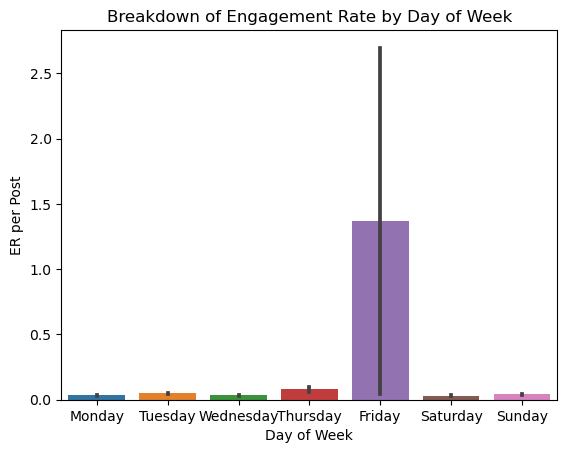

In [6]:
day_of_week, hour_of_day, time_of_day  = [],[],[]

# Processing the published_date data:
for date in published_date:
    day_of_week.append(date.strftime('%A'))
    
    hour = int(date.hour)
    hour_of_day.append(hour)
    
    if 0 <=hour <= 6:
        time_of_day.append('Night')
    elif 6 < hour <= 12:
        time_of_day.append('Morning')
    elif 12 < hour <= 18:
        time_of_day.append('Afternoon')
    elif 18 < hour <= 24:
        time_of_day.append('Evening')
        
social_data['ER per Post'] = ER_per_post
social_data['Day of Week'], social_data['Hour of Day'], social_data['Time of Day'] = day_of_week, hour_of_day, time_of_day

## Creating the plot
day_summary = social_data.groupby('Day of Week',as_index=False)['ER per Post'].mean()

sns.barplot(data=social_data, x='Day of Week', y='ER per Post', errorbar='se',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Breakdown of Engagement Rate by Day of Week')

day_summary.sort_values(by='ER per Post',ascending=False,ignore_index=True)

On first look, it seems that Friday is significantly different from the other six days in terms of creating high engagement rates. However, Friday has a very large error bar - indicating a big standard deviation. Upon examining Friday more closely, I discovered one specific campaign on March 10th, 2023 that produces 940 engagement for 1 impression. The campaign was a Facebook photo without focusing on a specific game.

This highly engaging campaign (i.e. its extreme ER) is what drives the stark differences between Friday and the rest. I suspect that if we remove this campaign, Friday's ER would not stand out as much. However, without fully knowing the context behind an outlier, I'd rather keep it in the dataset. 

Next, let's further breakdown each day into four chunks of time: Night, Morning, Afternoon, Evening. I corresponded these four chunks with four six-hour quarters in the day starting from midnight to 6AM, 6AM to 12PM, so on and so forth.

Text(0.5, 1.0, 'Breakdown of Engagement Rate by Day of Week and Time of Day')

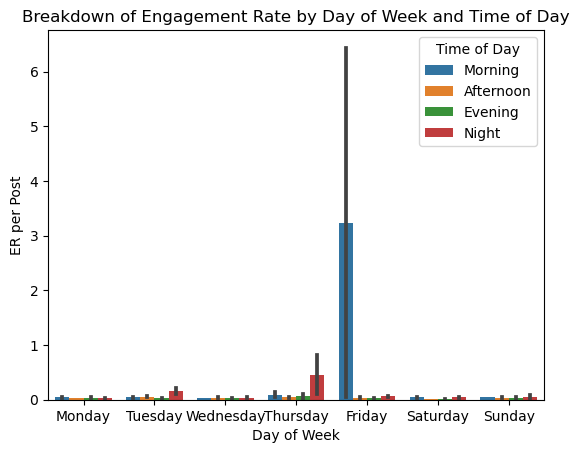

In [7]:
hue_list = ['Morning','Afternoon','Evening','Night']

sns.barplot(data=social_data, x='Day of Week', y='ER per Post', errorbar='se', hue='Time of Day', hue_order=hue_list,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Breakdown of Engagement Rate by Day of Week and Time of Day')

Except for the outlier on Friday morning, the next three best performing time for engagement rates would be Thursday night, Tuesday night, and Thursday morning - in that order. Based on this dataset within the year 2023, any social media campaigns posted on Tuesday and Thursday night (from 0 to 6AM) or on Thursday morning (from 6AM to 12PM) are associated with higher ER performance.

<ins>In general, it seems that Thursday is a good day to post on social media</ins> . However, it should be noted that this data is observational - and not experimental, so I'd be hesitant to use causal languages such as "affect" to describe the relationship between engagement rates and day of the week and time of posting.

Text(0.5, 1.0, 'What the Breakdown would look like without Friday outlier')

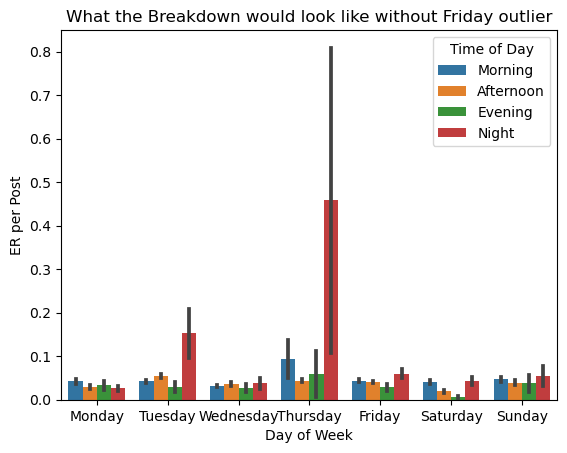

In [8]:
test = social_data.drop([837])

sns.barplot(data=test, x='Day of Week', y='ER per Post', errorbar='se', hue='Time of Day', hue_order=hue_list,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title('What the Breakdown would look like without Friday outlier')

## 3) Social performance of various game titles

,Account,ER per Post
0,General,0.462626
1,DOTA2,0.042983
2,Content Creators,0.040756
3,CSGO,0.030305
4,Valorant,0.030249


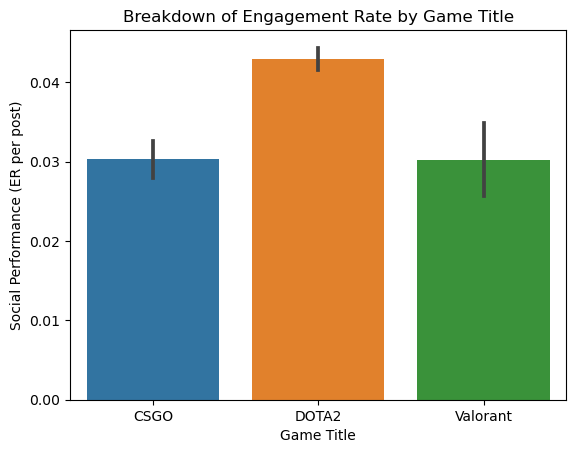

In [9]:
social_data['Account'] = social_data['Account'].str.strip() #Remove trailing whitespace in data
#The three game titles are CSGO, DOTA 2, and Valorant
np_social = np.array(social_data)
game_social = social_data[social_data.Account.isin(["Valorant", "CSGO","DOTA2"])]

#Creating the plot
game_summary = social_data.groupby('Account',as_index=False)['ER per Post'].mean()

sns.barplot(data=game_social, x='Account', y='ER per Post', errorbar='se')
plt.title('Breakdown of Engagement Rate by Game Title')
plt.xlabel('Game Title')
plt.ylabel('Social Performance (ER per post)')

game_summary.sort_values(by='ER per Post',ascending=False,ignore_index=True)

In terms of social performance, I'd say <ins> all three game titles are performing relatively the same</ins>. They generate about 3 to 4% engagement for each campaign posted. All of them perform, relatively, much worse than general content. It should be noted, though, that CSGO and Valorant only have one channel dedicated specifically to itself: Twitter and Youtube, respectively. DOTA2 also only has two (Twitter and Youtube) out of six possible channels. Therefore, I'd say <ins>it is not the game title that we should focus more or less on, but the social media channels catering to said titles.</ins>


## 4) Social performance across media types

,Media Type,ER per Post
0,Photo,0.694537
1,Mixed,0.107704
2,Album,0.100000
3,Video,0.049035
4,Carousel,0.037843
5,Text,0.024593
6,Link,0.016356


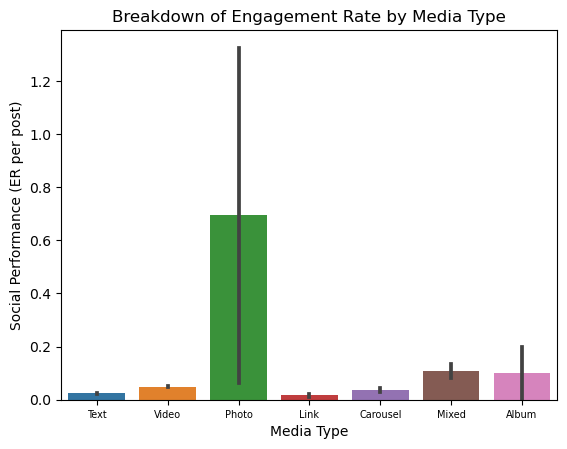

In [10]:
#Creating the plot
media_summary = social_data.groupby('Media Type',as_index=False)['ER per Post'].mean()

sns.barplot(data=social_data, x='Media Type', y='ER per Post', errorbar='se')
plt.title('Breakdown of Engagement Rate by Media Type')
plt.xticks(fontsize=7)
plt.ylabel('Social Performance (ER per post)')

media_summary.sort_values(by='ER per Post',ascending=False,ignore_index=True)

<ins>The best performing media type is Photo (see table summary above)</ins>, understandable given the aforementioned outlier Facebook post. The top three would be Photo, Mixed, and Album media type. In terms of ER performance, each of these three media type is more than twice as much as the next channel - Video. The lowest performing channel is Link. This is understandable since picture requires the shortest attention span - increasing the chance an audience member would engage.

## 5) Best performing campaign

,Campaign Name,ER per Post
0,N/A,0.680845
1,Community Engagement,0.056345
2,Evergreen,0.034675
3,Evil Exhibited,0.026818


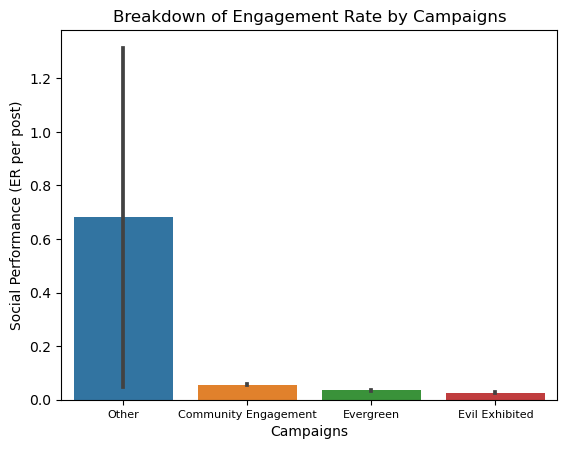

In [11]:
campaign_summary = social_data.groupby('Campaign Name',as_index=False)['ER per Post'].mean()

sns.barplot(data=social_data, x='Campaign Name', y='ER per Post', errorbar='se')
plt.title('Breakdown of Engagement Rate by Campaigns')
plt.xticks(fontsize=8,ticks=[0,1,2,3],labels=['Other','Community Engagement','Evergreen','Evil Exhibited'])
plt.xlabel('Campaigns')
plt.ylabel('Social Performance (ER per post)')

campaign_summary.sort_values(by='ER per Post',ascending=False,ignore_index=True)

<ins>The best performing campaign is "Community Engagement" </ins> without counting all other 'N/A' campaigns listed as 'Other' in this graph. Furthermore, "Community Engagement" also has the highest impression among all campaigns (see table below). It makes sense to think that a campaign that interacts the most with the audience (based on its name 'Community Engagement') would result in the highest ER.

In [12]:
campaign = social_data.groupby('Campaign Name',as_index=False)['Total Impressions'].sum()
campaign.sort_values(by='Total Impressions',ascending=False,ignore_index=True)

,Campaign Name,Total Impressions
0,Community Engagement,23803756
1,N/A,7298086
2,Evil Exhibited,5742595
3,Evergreen,1328729


## 6) Posting strategy

Using the discoveries made from the data, we can come up some basic principles for our posting strategy:

- **Thursday night (midnight to 6AM), Tuesday night, and Thursday morning (6AM to noon) are 'golden hours' for posting**: We should continue to save our best content for these three durations of the week due to its historically high ER performance.
<br>
- **Thursday in general is a good day to post content**: Without the aforementioned Friday post (outlier), Thursday would have the highest engagement return.
<br>
- **Prioritize visual and mixed-media types**: Campaigns that involve photos, videos, or a mixture of both of them tend to generate higher engagement. Any that requires more cognitive effort from users (i.e., text, directed links) tend to perform worse. Additionally, higher social performance is also reflected in shorter videos compared to longer ones. This is evidenced by the fact that our Tiktok channel is higher than YouTube in engagement.
<br>
- **Prioritize Facebook and Tiktok channels**: Based on our media type analysis, it is no surpise that these two social media - both of which are very friendly to photos and videos - outperform the rest. We should continue leaning on this strength and, if possible, dedicate title-specific contents on these channels (see (7) below for expansion strategies).
<br>
- **Focus more work on "Community Engagement"**: This is by far our best performing campaign, in fact it has the highest impression among all campaigns (see (5) above). Therefore, we should continute to dedicate more time and resources into creating quality 'Community Engagement' campaigns because quality content would turn more "impressions" into "engagement". 

## 7) Suggestions to expand 

**Game Title specific expansion**<br>
If we were to consider any expansion, <ins>a title-specific channel (i.e., Valorant/DOTA2/CSGO-specific) would be recommended</ins> since it better serves the niche community playing that specific game. We already have a lot of channels for general content, but only one to two channels for each game title. Based on the discoveries made from the data, some of the specific recommendations would be:

- **Prioritize photo-friendly Facebook**: In terms of ER performance, not only does photo generate the highest amount among the media types, but our general Facebook page also tops across all social media channels (see below).
<br>
- **Utilize (very) short videos on Tiktok**: When it comes to human attention span, the next best thing that captures engagement after a picture is a series of video - preferably in bite-sized chunks. Therefore, it is no surprise that Tiktok comes second after Facebook in producing ER for general content (see below). If we already had a Twitter dedicated to Valorant/DOTA2/CSGO specifically, there's no reason not to try a similar Tiktok approach.
<br>
- **Publish most engaging content on Thursday (night and morning) and Tuesday night**: Whether it is a photo on Facebook or short videos on Tiktok, save the best of our content for these three time periods. In the other remaining time of the week, we still publish relevant content to maintain audience engagement. 
<br>
- **Don't be afraid of text or directed link - if they makes sense**: These two media types generated the least amount of engagement; however I'd argue one should not completely avoid them. Since the expanded channels are title-specific, it would have a more niche set of followers of mostly people who already played the game. These users are more dedicated to the topic and therefore have a higher chance of engaging in quality content. The social media team can test out specific text- or link-based campaigns on less "risky" days (not Thursday and Tuesday).
<br>
- **Consider gamer-specific social medium**: Unrelated to the dataset, but another way to increase engagement from gamers is to "be among" the gamers themselves. If we're considering a title-specific channel, the social media team could look into Twitch, Discord, and Reddit. These channels are among the most popular social platforms used by gamers.

,Account Type,ER per Post
0,FBPAGE,0.149066
1,TIKTOK_BUSINESS,0.053168
2,TWITTER,0.032490
3,YOUTUBE,0.030489
4,LINKEDIN_COMPANY,0.017950
5,INSTAGRAM,0.006668


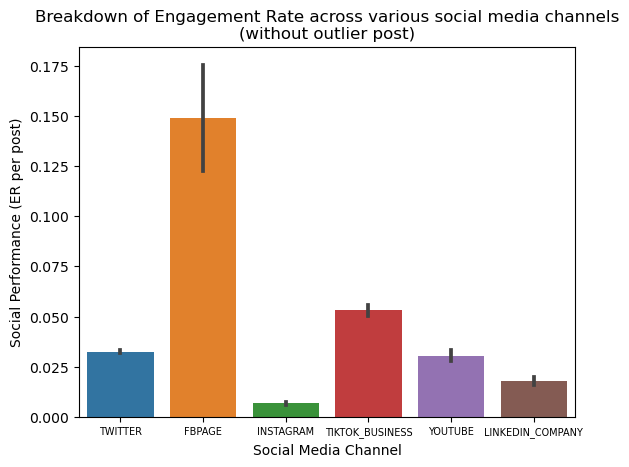

In [13]:
account_summary = test.groupby('Account Type',as_index=False)['ER per Post'].mean()

sns.barplot(data=test, x='Account Type', y='ER per Post', errorbar='se')
plt.title('Breakdown of Engagement Rate across various social media channels\n(without outlier post)')
plt.xticks(fontsize=7)
plt.xlabel('Social Media Channel')
plt.ylabel('Social Performance (ER per post)')

account_summary.sort_values(by='ER per Post',ascending=False,ignore_index=True)